In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import lightgbm as lgb
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMClassifier
from lightgbm import LGBMRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import RFECV
from sklearn.model_selection import StratifiedKFold
from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.neighbors import LocalOutlierFactor
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import LocalOutlierFactor
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import KFold
from optuna.samplers import TPESampler
import optuna
import statsmodels.api as sm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_pacf
from sklearn.feature_selection import RFE
from sklearn.inspection import permutation_importance
from imblearn.over_sampling import SMOTE
from sklearn.metrics import f1_score
from sklearn.preprocessing import OrdinalEncoder

c:\Users\Pc\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [93]:
df = pd.read_csv(r'C:\Users\Pc\Desktop\anadolu-hayat-emeklilik-datathon-2024\train.csv')

C:\Users\Pc\AppData\Local\Temp\ipykernel_16784\1419671901.py:1: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'C:\Users\Pc\Desktop\anadolu-hayat-emeklilik-datathon-2024\train.csv')


# EKSİK VERİ TESPİTİ

In [94]:
# verinin yarısından fazlası eksik olanları sildim
silinen_colunmlar = []
for i in df.columns:
    if df[i].isnull().sum() > (df.shape[0] * 0.5):
        print('Eksik veri tespit edildi:', end = " ")
        print(i)
        silinen_colunmlar.append(i)
        print('Eksik Veri Sayısı:', end = " ")
        print(df[i].isnull().sum())
        df.drop(columns=i, inplace = True)

Eksik veri tespit edildi: SORU_YATIRIM_KARAKTERI_CVP
Eksik Veri Sayısı: 720021
Eksik veri tespit edildi: SORU_YATIRIM_KARAKTERI_RG
Eksik Veri Sayısı: 720021
Eksik veri tespit edildi: SON_AY_KATKI_MIKTARI
Eksik Veri Sayısı: 851739
Eksik veri tespit edildi: SON_AY_KATKI_ADET
Eksik Veri Sayısı: 851739
Eksik veri tespit edildi: SON_CEYREK_KATKI_MIKTARI
Eksik Veri Sayısı: 847099
Eksik veri tespit edildi: SON_CEYREK_KATKI_ADET
Eksik Veri Sayısı: 847099
Eksik veri tespit edildi: SON_SENE_KATKI_MIKTARI
Eksik Veri Sayısı: 837713
Eksik veri tespit edildi: SON_SENE_KATKI_ADET
Eksik Veri Sayısı: 837713


In [95]:
# Verinin 0.4'ü ve 0.5'i arasında kalanları tek tek inceledim
for i in df.columns:
    if df[i].isnull().sum() > (df.shape[0] * 0.4):
        print('Eksik veri tespit edildi:', end = " ")
        print(i)
        print('Eksik Veri Sayısı:', end = " ")
        print(df[i].isnull().sum())

Eksik veri tespit edildi: SORU_COCUK_SAYISI_CVP
Eksik Veri Sayısı: 416560
Eksik veri tespit edildi: SORU_COCUK_SAYISI_RG
Eksik Veri Sayısı: 416560


In [96]:
value_counts = df['SORU_COCUK_SAYISI_CVP'].value_counts(normalize=True)
# value counts oranlarına göre yeni değerleri koydum
df['SORU_COCUK_SAYISI_CVP'] = df['SORU_COCUK_SAYISI_CVP'].apply(lambda x: np.random.choice(value_counts.index, p=value_counts.values) if pd.isna(x) else x)

In [97]:
value_counts_2 = df['SORU_COCUK_SAYISI_RG'].value_counts(normalize = True)
# value counts oranlarına göre yeni değerleri koydum
df['SORU_COCUK_SAYISI_RG'] = df['SORU_COCUK_SAYISI_RG'].apply(lambda x: np.random.choice(value_counts_2.index, p=value_counts_2.values) if pd.isna(x) else x)

In [98]:
# 0.3-0.4 arasındakilere de bir baktım
for i in df.columns:
    if df[i].isnull().sum() > (df.shape[0] * 0.3):
        print('Eksik veri tespit edildi:', end = " ")
        print(i)
        print('Eksik Veri Sayısı:', end = " ")
        print(df[i].isnull().sum())

Eksik veri tespit edildi: SORU_GELIR_CVP
Eksik Veri Sayısı: 277902
Eksik veri tespit edildi: SORU_GELIR_RG
Eksik Veri Sayısı: 277902


In [16]:
# df['SORU_GELIR_CVP'] = df['SORU_GELIR_CVP'].astype('float64') hata veriyor çünkü 'nokta' yerine 'virgül' var veride

In [99]:
if df['SORU_GELIR_CVP'].dtype == 'object':
    df['SORU_GELIR_CVP'] = df['SORU_GELIR_CVP'].str.replace(',', '.').astype(float)

In [19]:
# bunu KNN ile doldurmak daha doğru olabilir
df['SORU_GELIR_CVP'].value_counts()

SORU_GELIR_CVP
0.0          68975
2000.0       40299
5000.0       39428
3000.0       38332
1000.0       29212
             ...  
1058670.0        1
157000.0         1
3335.0           1
4891.0           1
65.0             1
Name: count, Length: 2392, dtype: int64

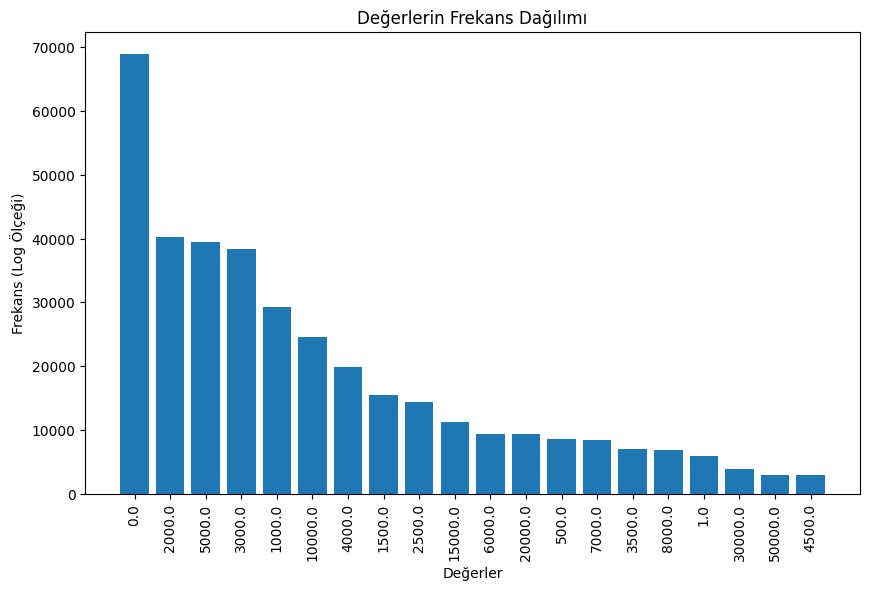

In [20]:
# Değerlerin sayısını hesapla
value_counts = df['SORU_GELIR_CVP'].value_counts().head(20)

# Log ölçekli grafik çizme
plt.figure(figsize=(10, 6))
plt.bar(value_counts.index.astype(str), value_counts.values)
plt.xlabel('Değerler')
plt.ylabel('Frekans (Log Ölçeği)')
plt.title('Değerlerin Frekans Dağılımı')
plt.xticks(rotation=90)
plt.show()

In [21]:
df['SORU_GELIR_CVP'].value_counts().head(10)

SORU_GELIR_CVP
0.0        68975
2000.0     40299
5000.0     39428
3000.0     38332
1000.0     29212
10000.0    24636
4000.0     19842
1500.0     15524
2500.0     14408
15000.0    11169
Name: count, dtype: int64

In [100]:
value_counts_3 = df['SORU_GELIR_CVP'].value_counts().head(10)
value_counts_3 = df['SORU_GELIR_CVP'].value_counts(normalize = True)
# value counts oranlarına göre yeni değerleri koydum
df['SORU_GELIR_CVP'] = df['SORU_GELIR_CVP'].apply(lambda x: np.random.choice(value_counts_3.index, p=value_counts_3.values) if pd.isna(x) else x)

In [101]:
value_counts_4 = df['SORU_GELIR_RG'].value_counts(normalize = True)
# value counts oranlarına göre yeni değerleri koydum
df['SORU_GELIR_RG'] = df['SORU_GELIR_RG'].apply(lambda x: np.random.choice(value_counts_4.index, p=value_counts_4.values) if pd.isna(x) else x)

In [102]:
for i in df.columns:
    if df[i].isnull().sum() > 0:
        print('Eksik veri tespit edildi:', end = " ")
        print(i)
        print('Eksik Veri Sayısı:', end = " ")
        print(df[i].isnull().sum())

Eksik veri tespit edildi: PP_MESLEK
Eksik Veri Sayısı: 88620
Eksik veri tespit edildi: SORU_MEDENI_HAL_CVP
Eksik Veri Sayısı: 1780
Eksik veri tespit edildi: SORU_MEDENI_HAL_RG
Eksik Veri Sayısı: 1780
Eksik veri tespit edildi: SORU_EGITIM_CVP
Eksik Veri Sayısı: 127095
Eksik veri tespit edildi: SORU_EGITIM_RG
Eksik Veri Sayısı: 127095


In [103]:
df['PP_MESLEK'] = df['PP_MESLEK'].fillna('Bilinmiyor')

In [104]:
value_counts_5 = df['SORU_MEDENI_HAL_CVP'].value_counts(normalize = True)
# value counts oranlarına göre yeni değerleri koydum
df['SORU_MEDENI_HAL_CVP'] = df['SORU_MEDENI_HAL_CVP'].apply(lambda x: np.random.choice(value_counts_5.index, p=value_counts_5.values) if pd.isna(x) else x)

In [105]:
df.drop(columns = 'SORU_MEDENI_HAL_RG', inplace = True)

In [106]:
value_counts_6 = df['SORU_EGITIM_CVP'].value_counts(normalize = True)
# value counts oranlarına göre yeni değerleri koydum
df['SORU_EGITIM_CVP'] = df['SORU_EGITIM_CVP'].apply(lambda x: np.random.choice(value_counts_6.index, p=value_counts_6.values) if pd.isna(x) else x)

In [107]:
value_counts_7 = df['SORU_EGITIM_RG'].value_counts(normalize = True)
# value counts oranlarına göre yeni değerleri koydum
df['SORU_EGITIM_RG'] = df['SORU_EGITIM_RG'].apply(lambda x: np.random.choice(value_counts_7.index, p=value_counts_7.values) if pd.isna(x) else x)

In [2]:
Object_olacaklar = [
    'PP_CINSIYET', 'PP_MUSTERI_SEGMENTI', 'PP_UYRUK' 
]                      # BUNLAR INT64 VERI TIPINDA

In [110]:
for i in Object_olacaklar:
    df[i] = df[i].astype('object')

In [111]:
df.select_dtypes('object')

,MUSTERI_ID,LABEL,FLAG,PP_CINSIYET,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,SORU_MEDENI_HAL_CVP,SORU_EGITIM_CVP
0,61921038d5c39a821cfed2e5e3ad88740decd1fbd6f34b...,UA,HAZIRAN,2,Öğretmen,105,1,Single,(Diğer)
1,8cd400d3897e5ff130e8e942ee1906d17531a8253d26a4...,UA,HAZIRAN,2,Emekli (Sosyal Güvenlik Kurumu Bilinmiyor),102,1,Married,İlköğretim
2,6af95ba9ebe2362a0b31b4443fb2405b11d588780c01ad...,HU19,HAZIRAN,2,Muhasebe,104,1,Single,Lisans
3,fe33e7873368d603d2a49a982619e8d61a964d7a0ef68e...,UA,MAYIS,2,Diğer,106,1,Married,Lise
4,aae8411e2c335e94922290314abe1fcc81044e8071e1c8...,UA,EYLUL,2,İşçi,103,1,Married,Lisans
...,...,...,...,...,...,...,...,...,...
852714,4a245f1a49af39319faa41668d6ee425fb71c7a75e8b22...,UA,MAYIS,1,İşçi,105,1,Married,Lisans
852715,2087a8e5f1f98d143011df1cccaa0331e3427b1a1e642e...,UA,HAZIRAN,2,Ev Hanımı,104,1,Married,Lisans
852716,8d4dccb1bd4763e909476935805d99b84e7f2098b646b7...,UA,MAYIS,1,İşçi,106,1,Single,Lise
852717,e33a48c42db1da438d54da64cf59ef4acae4583bd4effc...,UA,MAYIS,2,Bilinmiyor,106,1,Single,(Diğer)


In [112]:
MUSTERI_ID = df['MUSTERI_ID']

df.drop(columns = 'MUSTERI_ID', inplace = True)

In [102]:
def explore_data_types(df):
  numeric_columns = df.select_dtypes(include=['int64','float64']).columns
  print("\nNumeric Columns:")
  print(numeric_columns)
  categorical_columns = df.select_dtypes(include=['object']).columns
  print("\nCategorical Columns:")
  print(categorical_columns)
  cardinal_columns = [column for column in df.columns if df[column].nunique() == len(df)]
  print('\nCardinal Columns:')
  print(cardinal_columns)
  binary_columns = [column for column in df.columns if df[column].nunique() == 2]
  print('\nBinary Columns')
  print(binary_columns)
  return numeric_columns, categorical_columns, cardinal_columns, binary_columns

In [103]:
numeric_columns, categorical_columns, cardinal_columns, binary_columns = explore_data_types(df)


Numeric Columns:
Index(['PP_CINSIYET', 'PP_YAS', 'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL',
       'SORU_EGITIM_RG', 'SORU_GELIR_CVP', 'SORU_GELIR_RG',
       'SORU_COCUK_SAYISI_CVP', 'SORU_COCUK_SAYISI_RG',
       'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11', 'ANAPARA',
       'GETIRI', 'BU01', 'BU02', 'BU03', 'BU04', 'BU05', 'BU06', 'BU07',
       'BU08', 'BU09', 'BU10', 'BU11', 'BU12', 'BU13', 'BU14', 'BU15', 'BU16',
       'BU17', 'BU18', 'BU19', 'BU20', 'BU21', 'BU22', 'BU23', 'BU24', 'HU01',

In [124]:
df.to_csv('data_analytics.csv', index=False)

In [381]:
df = pd.read_csv(r'C:\Users\Pc\Desktop\python çalışmaları\data_analytics.csv')

In [382]:
df['EGITIM_RG'] = df['SORU_EGITIM_RG'].apply(lambda x: 0 if x > 60 else 1)

In [383]:
df.drop(columns= 'SORU_EGITIM_RG', inplace = True)

In [384]:
df['BU_TOPLAM'] = df['BU01'] + df['BU02'] + df['BU03'] + df['BU04'] + df['BU05'] + df['BU06'] + df['BU07'] + df['BU08'] + df['BU09'] + df['BU10'] + df['BU11'] + df['BU12']
+ df['BU13'] + df['BU14'] + df['BU15'] + df['BU16'] + df['BU17'] + df['BU18'] + df['BU19'] + df['BU20'] + df['BU21'] + df['BU22'] + df['BU23'] + df['BU24']

0         0
1         1
2         1
3         1
4         1
         ..
852714    1
852715    0
852716    1
852717    0
852718    0
Length: 852719, dtype: int64

In [385]:
df.drop(columns = ['BU01', 'BU02', 'BU03', 'BU04', 'BU05', 'BU06', 'BU07',
       'BU08', 'BU09', 'BU10', 'BU11', 'BU12', 'BU13', 'BU14', 'BU15', 'BU16',
       'BU17', 'BU18', 'BU19', 'BU20', 'BU21', 'BU22', 'BU23', 'BU24'], inplace = True)

# OUTLIER

In [15]:
from sklearn.neighbors import NearestNeighbors

features_1 = df[['PP_MESLEK', 'SORU_GELIR_CVP']] 

In [16]:
# KNN modelini oluşturma
knn_1 = NearestNeighbors(n_neighbors=20)  # Burada n_neighbors parametresi komşu sayısını belirler
knn_1.fit(features_1)


NearestNeighbors(n_neighbors=20)

In [17]:
# Her veri noktasının komşuluk uzaklıklarını hesaplama
distances_1, _1 = knn_1.kneighbors(features_1)

In [18]:
threshold_1 = np.percentile(distances_1[:, -1], 98)  

In [19]:
outliers_1 = distances_1[:,-1] > threshold_1

In [20]:
son_hali_1 = distances_1[:, -1] <= threshold_1

In [21]:
df = df[son_hali_1]

df.shape

(835777, 64)

In [22]:
features_2 = df[['PP_YAS', 'SORU_COCUK_SAYISI_CVP']] 

knn_2 = NearestNeighbors(n_neighbors=20)  # Burada n_neighbors parametresi komşu sayısını belirler
knn_2.fit(features_2)

NearestNeighbors(n_neighbors=20)

In [23]:
distances_2, _2= knn_2.kneighbors(features_2)

threshold_2 = np.percentile(distances_2[:, -1], 98)  

son_hali_2 = distances_2[:, -1] <= threshold_2

df = df[son_hali_2]

df.shape

(833134, 64)

In [211]:
df.shape

(828043, 64)

In [64]:
df.columns

Index(['LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_MEDENI_HAL_CVP',
       'SORU_EGITIM_CVP', 'SORU_EGITIM_RG', 'SORU_GELIR_CVP', 'SORU_GELIR_RG',
       'SORU_COCUK_SAYISI_CVP', 'SORU_COCUK_SAYISI_RG',
       'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11', 'ANAPARA',
       'GETIRI', 'HU01', 'HU02', 'HU03', 'HU04', 'HU05', 'HU06', 'HU07',
       'HU10', 'HU11', 'HU12', 'HU13', 'HU14', 'HU15', 'HU16', 'HU17', 'HU18',
       'HU19', 'A

# LABEL ENCODE

In [386]:
df['PP_CINSIYET'] = df['PP_CINSIYET'].astype('int64')
df['PP_MUSTERI_SEGMENTI'] = df['PP_MUSTERI_SEGMENTI'].astype('int64')
df['PP_UYRUK'] = df['PP_UYRUK'].astype('int64')

In [387]:
eğitim_sıra = ['(Diğer)', 'İlköğretim', 'Lise', 'Önlisans', 'Lisans', 'Yüksek Lisans', 'Doktora']

In [388]:
label_encode_label=LabelEncoder()
label_encode_FLAG=LabelEncoder()
label_encode_PP_MESLEK=LabelEncoder()
label_encode_SORU_MEDENI_HAL_CVP=LabelEncoder()
label_encode_SORU_EGITIM_CVP = OrdinalEncoder(categories=[eğitim_sıra])

df['LABEL']=label_encode_label.fit_transform(df['LABEL'])
df['FLAG']=label_encode_FLAG.fit_transform(df['FLAG'])
df['PP_MESLEK']=label_encode_PP_MESLEK.fit_transform(df['PP_MESLEK'])
df['SORU_MEDENI_HAL_CVP']=label_encode_SORU_MEDENI_HAL_CVP.fit_transform(df['SORU_MEDENI_HAL_CVP'])
df['SORU_EGITIM_CVP']=label_encode_SORU_EGITIM_CVP.fit_transform(df[['SORU_EGITIM_CVP']])

In [73]:
print("Kategori: ", label_encode_label.classes_)
print("Sayısal Değerler: ", list(range(len(label_encode_label.classes_))))

Kategori:  ['HU06' 'HU07' 'HU11' 'HU12' 'HU14' 'HU15' 'HU19' 'UA']
Sayısal Değerler:  [0, 1, 2, 3, 4, 5, 6, 7]


In [71]:
label_encode_SORU_EGITIM_CVP.categories_

[array(['(Diğer)', 'İlköğretim', 'Lise', 'Önlisans', 'Lisans',
        'Yüksek Lisans', 'Doktora'], dtype=object)]

In [72]:
print("Kategori: ", label_encode_FLAG.classes_)
print("Sayısal Değerler: ", list(range(len(label_encode_FLAG.classes_))))

Kategori:  ['AGUSTOS' 'EKIM' 'EYLUL' 'HAZIRAN' 'MAYIS' 'TEMMUZ']
Sayısal Değerler:  [0, 1, 2, 3, 4, 5]


# OUTLIER

In [10]:
df.columns

Index(['LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_MEDENI_HAL_CVP',
       'SORU_EGITIM_CVP', 'SORU_GELIR_CVP', 'SORU_GELIR_RG',
       'SORU_COCUK_SAYISI_CVP', 'SORU_COCUK_SAYISI_RG',
       'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11', 'ANAPARA',
       'GETIRI', 'HU01', 'HU02', 'HU03', 'HU04', 'HU05', 'HU06', 'HU07',
       'HU10', 'HU11', 'HU12', 'HU13', 'HU14', 'HU15', 'HU16', 'HU17', 'HU18',
       'HU19', 'AKTIF_ILK_POLICE_RG

In [389]:
numeric_columns = [
       'SORU_GELIR_CVP','SORU_COCUK_SAYISI_CVP','ANAPARA',
       'GETIRI']

In [390]:
for columns in numeric_columns:
    Q1=df[columns].quantile(0.02)
    Q3=df[columns].quantile(0.98)
    IQR=Q3-Q1
    lower_bound=Q1-1.5*IQR
    upper_bound=Q3+1.5*IQR
    df = df[(df[columns]>=lower_bound) & (df[columns]<=upper_bound)]

In [276]:
df.columns

Index(['LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_MEDENI_HAL_CVP',
       'SORU_EGITIM_CVP', 'SORU_GELIR_CVP', 'SORU_GELIR_RG',
       'SORU_COCUK_SAYISI_CVP', 'SORU_COCUK_SAYISI_RG',
       'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11', 'ANAPARA',
       'GETIRI', 'HU01', 'HU02', 'HU03', 'HU04', 'HU05', 'HU06', 'HU07',
       'HU10', 'HU11', 'HU12', 'HU13', 'HU14', 'HU15', 'HU16', 'HU17', 'HU18',
       'HU19', 'AKTIF_ILK_POLICE_RG

In [26]:
df.shape

(826790, 64)

In [322]:
df = df[df['SORU_GELIR_CVP'] >= 0]

In [326]:
df['SORU_COCUK_SAYISI_CVP'] = df['SORU_COCUK_SAYISI_CVP'].replace({2.0 : 1.0})

In [162]:
df['BES_AYRILMA_TALEP_ADET'].value_counts()

BES_AYRILMA_TALEP_ADET
0    836752
1      6736
2       775
3        96
4        24
5         3
7         1
8         1
Name: count, dtype: int64

In [329]:
df.drop(columns = 'BES_AYRILMA_TALEP_ADET', inplace = True)

In [331]:
df.drop(columns = 'ODEMEME_TALEP_ADET', inplace = True)

In [333]:
df.drop(columns = 'HAYAT_AYRILMA_TALEP_ADET', inplace = True)

In [335]:
df.drop(columns = 'BILGI_TALEP_ADET', inplace = True)

In [319]:
df.columns

Index(['LABEL', 'FLAG', 'PP_CINSIYET', 'PP_YAS', 'PP_MESLEK',
       'PP_MUSTERI_SEGMENTI', 'PP_UYRUK', 'IL', 'SORU_MEDENI_HAL_CVP',
       'SORU_EGITIM_CVP', 'SORU_GELIR_CVP', 'SORU_GELIR_RG',
       'SORU_COCUK_SAYISI_CVP', 'SORU_COCUK_SAYISI_RG',
       'BES_AYRILMA_TALEP_ADET', 'ODEMEME_TALEP_ADET',
       'HAYAT_AYRILMA_TALEP_ADET', 'BILGI_TALEP_ADET', 'VADE_TUTAR_0',
       'ODEME_TUTAR_0', 'VADE_TUTAR_1', 'ODEME_TUTAR_1', 'VADE_TUTAR_2',
       'ODEME_TUTAR_2', 'VADE_TUTAR_3', 'ODEME_TUTAR_3', 'VADE_TUTAR_4',
       'ODEME_TUTAR_4', 'VADE_TUTAR_5', 'ODEME_TUTAR_5', 'VADE_TUTAR_6',
       'ODEME_TUTAR_6', 'VADE_TUTAR_7', 'ODEME_TUTAR_7', 'VADE_TUTAR_8',
       'ODEME_TUTAR_8', 'VADE_TUTAR_9', 'ODEME_TUTAR_9', 'VADE_TUTAR_10',
       'ODEME_TUTAR_10', 'VADE_TUTAR_11', 'ODEME_TUTAR_11', 'ANAPARA',
       'GETIRI', 'HU01', 'HU02', 'HU03', 'HU04', 'HU05', 'HU06', 'HU07',
       'HU10', 'HU11', 'HU12', 'HU13', 'HU14', 'HU15', 'HU16', 'HU17', 'HU18',
       'HU19', 'AKTIF_ILK_POLICE_RG

In [391]:
# Log10 dönüşümü uygulayacağınız sütunların adları
columns_to_transform = ['SORU_GELIR_CVP', 'SORU_GELIR_RG', 'SORU_COCUK_SAYISI_RG','ANAPARA','GETIRI','AKTIF_ILK_POLICE_RG']

# Dönüşüm fonksiyonunu tanımlama
def apply_log10(df, columns):
    df_transformed = df.copy()
    for col in columns:
        # Negatif sonsuz ve NaN değerlerini sıfır ile değiştirme
        df_transformed[col] = df_transformed[col].replace(-np.inf, np.nan)  # -inf'yi NaN ile değiştirir
        df_transformed[col] = df_transformed[col].replace(np.nan, 0)      # NaN'yi 0 ile değiştirir
        
        # Log10 dönüşümü uygulama
        df_transformed[col] = df_transformed[col].apply(lambda x: np.log10(x) if x > 0 else 0)
    
    return df_transformed

# Dönüşümü uygula
df = apply_log10(df, columns_to_transform)

In [392]:
df_mayıs_haziran = df[((df['FLAG'] == 3) | (df['FLAG'] == 4))].sample(frac = 0.4, random_state = 42)

In [393]:
df = pd.concat([df.loc[df_mayıs_haziran.index], df[~((df['FLAG'] == 3) | (df['FLAG'] == 4))]], axis = 0)

# TRAIN - TEST - SPLIT

# HU14

In [24]:
import warnings

warnings.filterwarnings("ignore")

print("Kategori: ", label_encode_label.classes_)
print("Sayısal Değerler: ", list(range(len(label_encode_label.classes_))))

Kategori:  ['HU06' 'HU07' 'HU11' 'HU12' 'HU14' 'HU15' 'HU19' 'UA']
Sayısal Değerler:  [0, 1, 2, 3, 4, 5, 6, 7]


In [394]:
df_test_14 = df[df['FLAG'] ==  1]

df_test_14['LABEL'].replace({7:0, 1:0, 6:0, 3:0, 2:0, 5:0, 4:1}, inplace= True)

df_train_14 = df[df['FLAG'] !=  1]

df_train_14['LABEL'].replace({7:0, 1:0, 6:0, 3:0, 2:0, 5:0, 4:1}, inplace= True)

X_train_14 = df_train_14.drop(columns = 'LABEL')
y_train_14 = df_train_14['LABEL']

X_test_14 = df_test_14.drop(columns = 'LABEL')
y_test_14 = df_test_14['LABEL']

# HU06

In [395]:
df_test_06 = df[df['FLAG'] ==  1]

df_test_06['LABEL'].replace({7:0, 1:0, 6:0, 3:0, 2:0, 5:0, 4:0, 0:1}, inplace= True)

df_train_06 = df[df['FLAG'] !=  1]

df_train_06['LABEL'].replace({7:0, 1:0, 6:0, 3:0, 2:0, 5:0, 4:0, 0:1}, inplace= True)

X_train_06 = df_train_06.drop(columns = 'LABEL')
y_train_06 = df_train_06['LABEL']

X_test_06 = df_test_06.drop(columns = 'LABEL')
y_test_06 = df_test_06['LABEL']

# HU07

In [396]:
df_test_07 = df[df['FLAG'] ==  1]

df_test_07['LABEL'].replace({7:0, 6:0, 3:0, 2:0, 5:0, 4:0}, inplace= True)

df_train_07 = df[df['FLAG'] !=  1]

df_train_07['LABEL'].replace({7:0, 6:0, 3:0, 2:0, 5:0, 4:0}, inplace= True)

X_train_07 = df_train_07.drop(columns = 'LABEL')
y_train_07 = df_train_07['LABEL']

X_test_07 = df_test_07.drop(columns = 'LABEL')
y_test_07 = df_test_07['LABEL']

# HU11

In [397]:
df_test_11 = df[df['FLAG'] ==  1]

df_test_11['LABEL'].replace({7:0, 1:0, 6:0, 3:0, 2:1, 5:0, 4:0}, inplace= True)

df_train_11 = df[df['FLAG'] !=  1]

df_train_11['LABEL'].replace({7:0, 1:0, 6:0, 3:0, 2:1, 5:0, 4:0}, inplace= True)

X_train_11 = df_train_11.drop(columns = 'LABEL')
y_train_11 = df_train_11['LABEL']

X_test_11 = df_test_11.drop(columns = 'LABEL')
y_test_11 = df_test_11['LABEL']

# HU12

In [398]:
df_test_12 = df[df['FLAG'] ==  0]

df_test_12['LABEL'].replace({7:0, 0:0, 6:0, 3:1, 2:0, 5:0, 4:0, 1:0}, inplace= True)

df_train_12 = df[df['FLAG'] !=  0]

df_train_12['LABEL'].replace({7:0, 0:0, 6:0, 3:1, 2:0, 5:0, 4:0, 1:0}, inplace= True)

X_train_12 = df_train_12.drop(columns = 'LABEL')
y_train_12 = df_train_12['LABEL']

X_test_12 = df_test_12.drop(columns = 'LABEL')
y_test_12 = df_test_12['LABEL']

# HU15

In [399]:
df_test_15 = df[df['FLAG'] ==  0]

df_test_15['LABEL'].replace({7:0, 0:0, 6:0, 3:0, 2:0, 5:1, 4:0, 1:0}, inplace= True)

df_train_15 = df[df['FLAG'] !=  0]

df_train_15['LABEL'].replace({7:0, 0:0, 6:0, 3:0, 2:0, 5:1, 4:0, 1:0}, inplace= True)

X_train_15 = df_train_15.drop(columns = 'LABEL')
y_train_15 = df_train_15['LABEL']

X_test_15 = df_test_15.drop(columns = 'LABEL')
y_test_15 = df_test_15['LABEL']

# HU19

In [400]:
df_test_19 = df[df['FLAG'] ==  0]

df_test_19['LABEL'].replace({7:0, 0:0, 6:1, 3:0, 2:0, 5:0, 4:0, 1:0}, inplace= True)

df_train_19 = df[df['FLAG'] !=  0]

df_train_19['LABEL'].replace({7:0, 0:0, 6:1, 3:0, 2:0, 5:0, 4:0, 1:0}, inplace= True)

X_train_19 = df_train_19.drop(columns = 'LABEL')
y_train_19 = df_train_19['LABEL']

X_test_19 = df_test_19.drop(columns = 'LABEL')
y_test_19 = df_test_19['LABEL']

In [401]:
X_train_dict = {6: X_train_06, 7: X_train_07, 11: X_train_11, 12: X_train_12, 14: X_train_14, 15: X_train_15, 19: X_train_19}

X_test_dict = {6: X_test_06, 7: X_test_07, 11: X_test_11, 12: X_test_12, 14: X_test_14, 15: X_test_15, 19: X_test_19}

y_train_dict = {6: y_train_06, 7: y_train_07, 11: y_train_11, 12: y_train_12, 14: y_train_14, 15: y_train_15, 19: y_train_19}

y_test_dict = {6: y_test_06, 7: y_test_07, 11: y_test_11, 12: y_test_12, 14: y_test_14, 15: y_test_15, 19: y_test_19}

# SMOTE

In [287]:
object_features = ['PP_CINSIYET','PP_MUSTERI_SEGMENTI','PP_UYRUK','IL','FLAG', 'PP_MESLEK', 'SORU_MEDENI_HAL_CVP', 'SORU_EGITIM_CVP']

In [104]:
for i in [6, 7, 11, 12, 14, 15, 19]:
    # İlk önce y_train_dict[i] içindeki değerlerin sayımını yap
    value_counts = y_train_dict[i].value_counts()
    
    # Eğer 1 sınıfı mevcutsa ve 0 sınıfından azsa
    if 1 in value_counts and value_counts[1] < value_counts[0]:
        # 0 sınıfından 1 sınıfı kadar örnek al
        y_train_0_sampled = y_train_dict[i][y_train_dict[i] == 0].sample(n=value_counts[1], random_state=42)
        # 1 sınıfını ekle
        y_train_dict[i] = pd.concat([y_train_0_sampled, y_train_dict[i][y_train_dict[i] == 1]])

        index = y_train_dict[i].index

        print(y_train_dict[i].shape)
        
        # X_train_dict[i] ile uyumlu hale getirme
        X_train_dict[i] = X_train_dict[i].loc[index]
        
    else:
        print(f"Warning: 1 sınıfı {i} için mevcut değil ya da 0 sınıfından fazla.")

# Ayrıca, y_train_dict ve X_train_dict içindeki güncellenmiş veri çerçevelerini kontrol edin
for key in [6, 7, 11, 12, 14, 15, 19]:
    print(f"y_train_dict[{key}].shape:", y_train_dict[key].shape)
    print(f"X_train_dict[{key}].shape:", X_train_dict[key].shape)

(5480,)
(6328,)
(698,)
(1120,)
(18128,)
(716,)
(1252,)
y_train_dict[6].shape: (5480,)
X_train_dict[6].shape: (5480, 63)
y_train_dict[7].shape: (6328,)
X_train_dict[7].shape: (6328, 63)
y_train_dict[11].shape: (698,)
X_train_dict[11].shape: (698, 63)
y_train_dict[12].shape: (1120,)
X_train_dict[12].shape: (1120, 63)
y_train_dict[14].shape: (18128,)
X_train_dict[14].shape: (18128, 63)
y_train_dict[15].shape: (716,)
X_train_dict[15].shape: (716, 63)
y_train_dict[19].shape: (1252,)
X_train_dict[19].shape: (1252, 63)


In [ ]:
smote = SMOTE(sampling_strategy={1: 5000}, random_state=42)
X_train_smote , y_train_smote = smote.fit_resample(X_train_dict[6], y_train_dict[6])

In [231]:
X_train_dict[6]

,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_MEDENI_HAL_CVP,SORU_EGITIM_CVP,SORU_GELIR_CVP,...,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG,EGITIM_RG,BU_TOPLAM
203229,3,2,28,21,106,1,80,5,0.000000,3000.000000,...,0,0,0,0,0,0,0,23,1,0
206743,3,2,375,58,104,1,35,3,4.000000,35000.000000,...,0,0,0,0,0,0,0,1,1,1
346839,2,1,428,102,102,1,6,3,4.000000,3000.000000,...,0,0,0,0,0,0,0,92,0,2
335741,3,1,365,110,102,1,54,3,4.000000,0.000000,...,0,0,0,0,0,0,0,0,0,0
260318,4,1,754,77,103,1,77,3,1.000000,5000.000000,...,0,0,0,0,0,0,0,157,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
754115,2,2,224,54,102,1,34,5,2.822933,2647.133368,...,0,0,0,0,0,0,0,8,1,0
754116,3,1,618,93,102,1,32,3,4.000000,9426.015364,...,0,0,0,0,0,0,0,12,1,0
754117,3,1,602,102,102,1,9,3,3.766132,2704.634814,...,0,0,0,0,0,0,0,154,0,1
754118,2,1,643,11,102,1,28,2,2.431588,3215.793826,...,0,0,0,0,0,0,0,70,0,0


In [402]:
for i in [6, 7, 11, 12, 14, 15, 19]:
    if y_train_dict[i].value_counts()[1] <= 5000:
        smote = SMOTE(sampling_strategy={1: 5000}, random_state=42)
        X_train_smote , y_train_smote = smote.fit_resample(X_train_dict[i], y_train_dict[i])
        
        # 0 sınıfını 3.000'e düşürmek için random undersampling
        X_0_i = X_train_smote[y_train_smote == 0].sample(5000, random_state=42)
        X_1_i = X_train_smote[y_train_smote == 1]
        y_0_i = y_train_smote[y_train_smote == 0].sample(5000, random_state=42)
        y_1_i = y_train_smote[y_train_smote == 1]
    
    else:
        # 0 sınıfını 3.000'e düşürmek için random undersampling
        X_0_i = X_train_dict[i][y_train_dict[i] == 0].sample(y_train_dict[i].value_counts()[1], random_state=42)
        X_1_i = X_train_dict[i][y_train_dict[i] == 1]
        y_0_i = y_train_dict[i][y_train_dict[i] == 0].sample(y_train_dict[i].value_counts()[1], random_state=42)
        y_1_i = y_train_dict[i][y_train_dict[i] == 1]

    # Yeni veri setini birleştirme
    X_train_i = pd.concat([X_0_i, X_1_i], axis=0)
    y_train_i = pd.concat([y_0_i, y_1_i], axis=0)

    # Sonuçları sözlükte sakla
    X_train_dict[i] = X_train_i
    y_train_dict[i] = y_train_i

In [377]:
for i in [6, 7, 11, 12, 14, 15, 19]:
    print(y_train_dict[i].value_counts())

LABEL
0    5000
1    5000
Name: count, dtype: int64
LABEL
0    5000
1    5000
Name: count, dtype: int64
LABEL
0    5000
1    5000
Name: count, dtype: int64
LABEL
0    5000
1    5000
Name: count, dtype: int64
LABEL
0    6845
1    6845
Name: count, dtype: int64
LABEL
0    5000
1    5000
Name: count, dtype: int64
LABEL
0    5000
1    5000
Name: count, dtype: int64


In [378]:
for i in [6, 7, 11, 12, 14, 15, 19]:
    print(X_train_dict[i].shape)

(10000, 63)
(10000, 63)
(10000, 63)
(10000, 63)
(13690, 63)
(10000, 63)
(10000, 63)


In [ ]:
X_train_dict[6].shape

# MODEL DENEME

In [288]:
def objective(trial, X, y, object_features):            # train set smote la eşitlendi model eğitildi test set üzerinden f1 skor belirlendi
    param = {
        'objective': 'binary',
        'metric': 'binary_logloss',
        'num_leaves': trial.suggest_int('num_leaves', 10, 400),              
        'max_depth': trial.suggest_int('max_depth', 3, 12),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'lambda_l1': trial.suggest_float('lambda_l1', 0, 100),                         
        'lambda_l2': trial.suggest_float('lambda_l2', 0, 100),
        'min_gain_to_split': trial.suggest_float('min_gain_to_split', 0, 15),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.1, 0.99),
        'bagging_freq': 1,
        'feature_fraction': trial.suggest_float('feature_fraction', 0.1, 0.99),
        'importance_type': trial.suggest_categorical('importance_type', ['split', 'gain']),
        'early_stopping_rounds': 10,
        'verbose': -1
    }
    cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=34)   # StratifiedKFold classification problemler için
    cv_scores = []

    for train_idx, test_idx in cv.split(X,y):                            # BURADA X, y VERMEK YERİNE X_TRAIN DİYE AYIRIP SONRASINDA YAPMAK LAZIM OLABİLİR
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # LightGBM Dataset oluşturma, categorical_feature parametresini kullan
        lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=object_features)
        lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train, categorical_feature=object_features)

        # Model eğitimi
        model = lgb.train(
            param, 
            lgb_train,
            valid_sets=[lgb_train, lgb_test],
            valid_names=['train', 'eval'],
            num_boost_round=1000,
        )

        y_pred = model.predict(X_test_14, num_iteration=model.best_iteration)
        y_pred = np.round(y_pred)  # Tahminleri 0 veya 1 olacak şekilde yuvarla

        score = f1_score(y_test_14, y_pred)  # F1 skoru kullan
        cv_scores.append(score)

    return np.mean(cv_scores)

# Optuna çalıştırma
study = optuna.create_study(direction='maximize', sampler=optuna.samplers.TPESampler())      # 123123213123123123
categorical_columns = object_features  # Burada kategorik sütunları belirtin
study.optimize(lambda trial: objective(trial, X_train_dict[15], y_train_dict[15], object_features), n_trials=200)

# En iyi hiperparametreleri ve sonuçları yazdırma
print('Best parameters:', study.best_params)
print('Best score:', study.best_value)

[I 2024-08-30 18:55:57,566] A new study created in memory with name: no-name-3760d86c-2f47-4510-b5b1-9a4931808e27
[I 2024-08-30 18:56:02,567] Trial 0 finished with value: 0.06689199464476807 and parameters: {'num_leaves': 221, 'max_depth': 3, 'learning_rate': 0.027107915717394383, 'n_estimators': 1338, 'min_child_samples': 54, 'lambda_l1': 95.93696403110616, 'lambda_l2': 69.61606650487974, 'min_gain_to_split': 7.57737942517495, 'bagging_fraction': 0.5393873224593313, 'feature_fraction': 0.573029031154931, 'importance_type': 'gain'}. Best is trial 0 with value: 0.06689199464476807.
[I 2024-08-30 18:56:06,481] Trial 1 finished with value: 0.07659642440611478 and parameters: {'num_leaves': 176, 'max_depth': 8, 'learning_rate': 0.17975805571708672, 'n_estimators': 786, 'min_child_samples': 99, 'lambda_l1': 24.358944190829025, 'lambda_l2': 98.2547586156368, 'min_gain_to_split': 5.196544480222349, 'bagging_fraction': 0.6391354190681894, 'feature_fraction': 0.28352272530521305, 'importance_ty

Best parameters: {'num_leaves': 169, 'max_depth': 6, 'learning_rate': 0.16425928318076294, 'n_estimators': 1945, 'min_child_samples': 24, 'lambda_l1': 3.868430795025683, 'lambda_l2': 91.5834505530295, 'min_gain_to_split': 0.014830089377118064, 'bagging_fraction': 0.970363185701036, 'feature_fraction': 0.5228547581397347, 'importance_type': 'gain'}
Best score: 0.10676756483116931


In [289]:
study.best_params

{'num_leaves': 169,
 'max_depth': 6,
 'learning_rate': 0.16425928318076294,
 'n_estimators': 1945,
 'min_child_samples': 24,
 'lambda_l1': 3.868430795025683,
 'lambda_l2': 91.5834505530295,
 'min_gain_to_split': 0.014830089377118064,
 'bagging_fraction': 0.970363185701036,
 'feature_fraction': 0.5228547581397347,
 'importance_type': 'gain'}

In [379]:
params = {'objective': 'binary',
          'metric': 'binary_logloss',
          'num_leaves': 169,
          'max_depth': 6,
          'learning_rate': 0.16425928318076294,
          'n_estimators': 1945,
          'min_child_samples': 24,
          'lambda_l1': 3.868430795025683,
          'lambda_l2': 91.5834505530295,
          'min_gain_to_split': 0.014830089377118064,
          'bagging_fraction': 0.970363185701036,
          'feature_fraction': 0.5228547581397347,
          'importance_type': 'gain',
          'early_stopping_rounds': 10,
          'verbose': -1
          }               # 0.199528672427337 aldık i=14 için # log10 yaptım 0.20325138143669416 # 0.22384428223844283 mayıs haziran ua sildim(log10suz log10 202 yaptı)

In [404]:
params = {'objective': 'binary',
          'metric': 'binary_logloss',
          'num_leaves': 180,
          'max_depth': 11,
          'learning_rate': 0.19076832918997969,
          'n_estimators': 485,
          'min_child_samples': 7,
          'lambda_l1': 98.33810166213875,
          'lambda_l2': 0.1450191516440431,
          'min_gain_to_split': 13.486477122576348,
          'bagging_fraction': 0.9228659159955044,
          'feature_fraction': 0.7162173291525694,
          'importance_type': 'gain',
          'early_stopping_rounds': 10,
          'verbose': -1
          }

In [406]:
params = {'objective': 'binary',
          'metric': 'binary_logloss',
          'num_leaves': 40,
          'max_depth': 5,
          'learning_rate': 0.15,
          'n_estimators': 715,
          'min_child_samples': 80,
          'lambda_l1': 0.17107936110243693,
          'lambda_l2': 15.779856945032417,
          'min_gain_to_split': 0.06905326228765873,
          'bagging_fraction': 0.5131543673879683,
          'feature_fraction': 0.22587145096193556,
          'importance_type': 'split',
          'early_stopping_rounds': 10,
          'verbose': -1
          }

# MODEL

In [407]:
f1_scores = []

thresholds = np.linspace(0, 1, 200)

for i in [6, 7, 11, 12, 14, 15, 19]:
    
    # LightGBM Dataset oluşturma, categorical_feature parametresini kullan
    lgb_train = lgb.Dataset(X_train_dict[i], label=y_train_dict[i], categorical_feature=object_features)
    lgb_test = lgb.Dataset(X_test_dict[i], label=y_test_dict[i], reference=lgb_train, categorical_feature=object_features)

    # Model eğitimi
    model = lgb.train(
        params, 
        lgb_train,
        valid_sets=[lgb_train, lgb_test],
        valid_names=['train', 'eval'],
        num_boost_round=1000,
    )

    y_pred = model.predict(X_test_dict[i], num_iteration=model.best_iteration)
    y_pred = np.round(y_pred)  # Tahminleri 0 veya 1 olacak şekilde yuvarla

    score_f1 = f1_score(y_test_dict[i], y_pred)  
    f1_scores.append(score_f1)

    print(f"F1 Score for i={i}: {score_f1}")
    
# Tüm F1 skorlarını yazdır
print(f1_scores)

F1 Score for i=6: 0.03618844882639628
F1 Score for i=7: 0.08126550868486353
F1 Score for i=11: 0.028392484342379957
F1 Score for i=12: 0.026625249611715113
F1 Score for i=14: 0.20455883589872992
F1 Score for i=15: 0.04050355774493705
F1 Score for i=19: 0.03974826101358066
[0.03618844882639628, 0.08126550868486353, 0.028392484342379957, 0.026625249611715113, 0.20455883589872992, 0.04050355774493705, 0.03974826101358066]


sample ı value_counta eşitledim :
F1 Score for i=6: 0.03717472118959108
F1 Score for i=7: 0.07267740829619472
F1 Score for i=11: 0.011722141823444283
F1 Score for i=12: 0.009344875073775329
F1 Score for i=14: 0.1710150447533803
F1 Score for i=15: 0.010128719139058873
F1 Score for i=19: 0.0207244212098581

bir tane paramda bu yukardaki geliyor
başka paramda da 

F1 Score for i=6: 0.02682307745077862
F1 Score for i=7: 0.06110283159463487
F1 Score for i=11: 0.008288871951219511
F1 Score for i=12: 0.0
F1 Score for i=14: 0.1558587881822734
F1 Score for i=15: 0.5932203389830507
F1 Score for i=19: 0.010498687664041995 :D

In [119]:
X_train_dict[15][X_train_dict[15]['HU15'] == 1].index

Index([   139,   2875,   4331,  14005,  15931,  18034,  29047,  31248,  36944,
        37114,
       ...
       765878, 770522, 770569, 796048, 799066, 802275, 814233, 816696, 827658,
       850574],
      dtype='int64', length=251)

In [121]:
y_train_dict[15][X_train_dict[15][X_train_dict[15]['HU15'] == 1].index].value_counts()

LABEL
1    251
Name: count, dtype: int64

In [121]:
lgb_train = lgb.Dataset(X_train, label=y_train, categorical_feature=object_features)
lgb_test = lgb.Dataset(X_test, label=y_test, reference=lgb_train, categorical_feature=object_features)

    # Model eğitimi
model_i = lgb.train(
    params, 
    lgb_train,
    valid_sets=[lgb_train, lgb_test],
    valid_names=['train', 'eval'],
    num_boost_round=1000,
    )

y_pred_i = model_i.predict(X_test, num_iteration=model_i.best_iteration)
y_pred_i = np.round(y_pred_i)  # Tahminleri 0 veya 1 olacak şekilde yuvarla

score_f1_i = f1_score(y_test, y_pred_i)  
f1_scores.append(score_f1_i)
print(confusion_matrix(y_test, y_pred_i))

print(f"F1 Score for i={i}: {score_f1_i}")

[[ 99  15]
 [ 27 112]]
F1 Score for i=19: 0.8421052631578947


In [108]:
X_test

,FLAG,PP_CINSIYET,PP_YAS,PP_MESLEK,PP_MUSTERI_SEGMENTI,PP_UYRUK,IL,SORU_MEDENI_HAL_CVP,SORU_EGITIM_CVP,SORU_GELIR_CVP,...,HU13,HU14,HU15,HU16,HU17,HU18,HU19,AKTIF_ILK_POLICE_RG,EGITIM_RG,BU_TOPLAM
145957,1,2,386,43,103,1,33,3,4.0,3500.0,...,0,0,0,0,0,0,0,99,0,2
792969,0,2,452,54,102,1,38,3,5.0,3000.0,...,0,0,0,0,0,1,0,101,0,2
160584,1,2,587,54,103,1,6,0,4.0,5000.0,...,0,0,0,0,0,0,0,24,0,0
172220,0,2,450,33,105,1,4,3,2.0,1000.0,...,0,0,0,0,0,0,0,10,1,1
435813,3,2,607,33,104,1,16,3,1.0,2000.0,...,0,0,0,0,0,0,0,45,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44936,5,2,598,33,105,1,45,3,1.0,7000.0,...,0,1,0,0,0,0,0,6,0,1
852242,3,2,638,102,105,1,35,0,4.0,6000.0,...,0,0,0,0,0,0,0,19,0,1
186150,1,2,540,33,105,1,63,3,2.0,3000.0,...,0,0,0,0,0,0,0,90,0,1
476272,3,2,532,110,103,1,61,3,0.0,6000.0,...,0,0,0,0,0,0,0,62,0,0


In [120]:
y_train.replace({7:0, 0:0, 6:0, 3:1, 2:0, 5:0, 4:0, 1:0}, inplace= True)
y_test.replace({7:0, 0:0, 6:0, 3:1, 2:0, 5:0, 4:0, 1:0}, inplace= True)

In [78]:
X_test

NameError: name 'X_test' is not defined

In [85]:
ürün_agirliklari = [0.0385, 0.0328, 0.2791, 0.1812, 0.0113, 0.2952, 0.1614]

agirlikli_f1_score = 0

for i in range(0,7):
    agirlikli_f1_score_i = f1_scores[i] * ürün_agirliklari[i]
    agirlikli_f1_score = agirlikli_f1_score + agirlikli_f1_score_i
agirlikli_f1_score

0.06546494781143768

In [ ]:
F1 Score for i=6: 0.028212083847102346
F1 Score for i=7: 0.05316540347748551
F1 Score for i=11: 0.028092922744462453
F1 Score for i=12: 0.02835203780271707
F1 Score for i=14: 0.14236090668236678
F1 Score for i=15: 0.13186813186813184
F1 Score for i=19: 0.056497175141242945

In [159]:
X_test['pred'] = y_pred     # 18-69

In [74]:
yaşa_takılanlar = X_test[((X_test['PP_YAS'] / 12) < 18) | ((X_test['PP_YAS'] / 12) > 69)].index 

In [75]:
X_test.loc[yaşa_takılanlar, 'pred'] = X_test.loc[yaşa_takılanlar, 'pred'].replace({1.0: 0.0})

In [76]:
X_test.loc[yaşa_takılanlar, 'pred'].value_counts()

pred
0.0    18693
Name: count, dtype: int64

In [77]:
score_f1 = f1_score(y_test, X_test['pred']) 

In [171]:
score_f1

0.1168594035301278

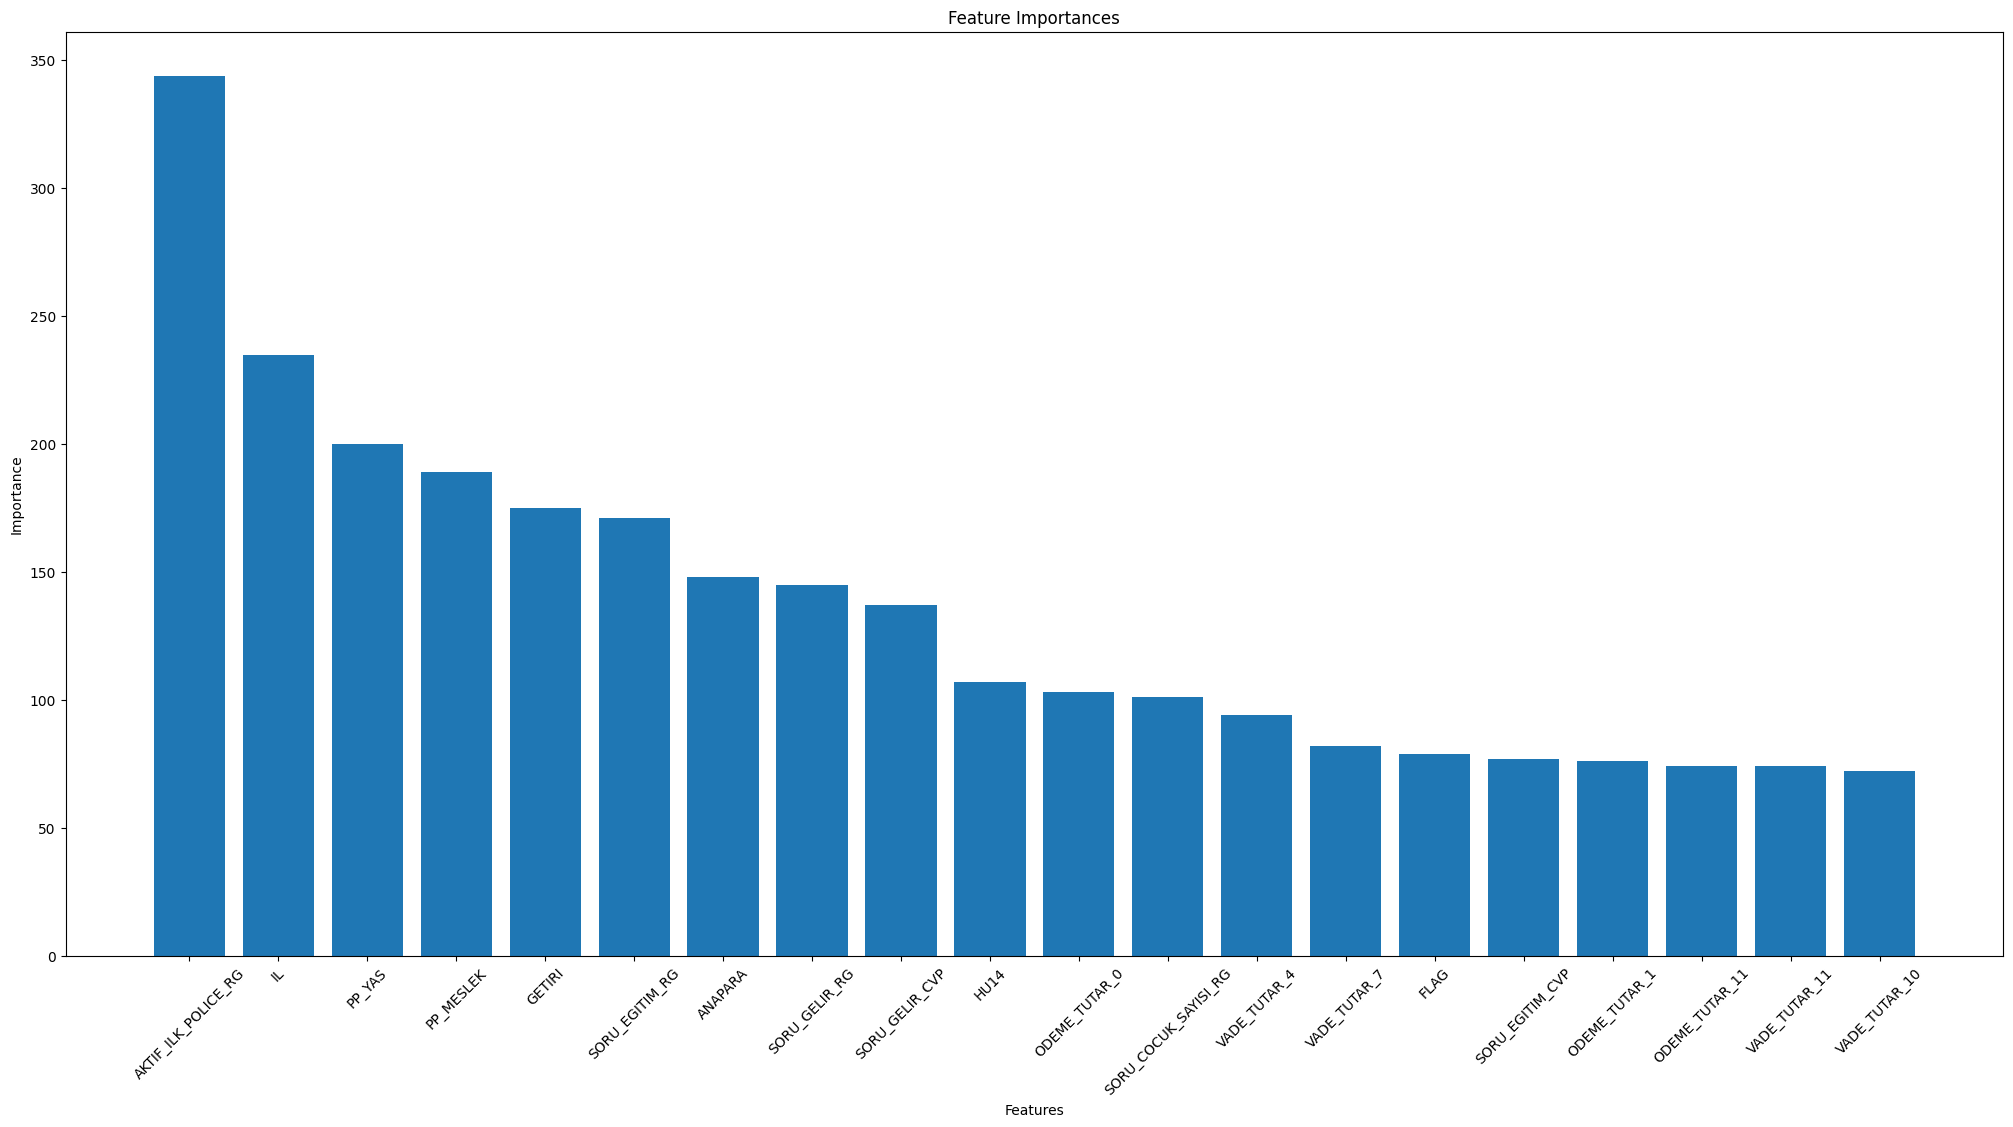

In [87]:
lgb_train_14 = lgb.Dataset(X_train_14, label=y_train_14, categorical_feature=object_features)
lgb_test_14 = lgb.Dataset(X_test_14, label=y_test_14, reference=lgb_train_14, categorical_feature=object_features)

model = lgb.train(
        params, 
        lgb_train_14,
        valid_sets=[lgb_train_14, lgb_test_14],
        valid_names=['train', 'eval'],
        num_boost_round=1000,
    )

importance = model.feature_importance()
importance_df = pd.DataFrame({'Features': X_train_14.columns, 'Importance': importance})

# Değişken önemlerini azalan sıraya göre sıralayın
importance_df = importance_df.sort_values(by='Importance', ascending=False).head(20)
# Değişken önemlerini çubuk grafikle gösterin
plt.figure(figsize=(25, 12))
plt.bar(importance_df['Features'], importance_df['Importance'])
plt.xlabel('Features')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.xticks(rotation=45)
plt.show()

In [88]:
import shap   ['PP_MESLEK', 'SORU_GELIR_CVP'] ['PP_YAS', 'SORU_COCUK_SAYISI']

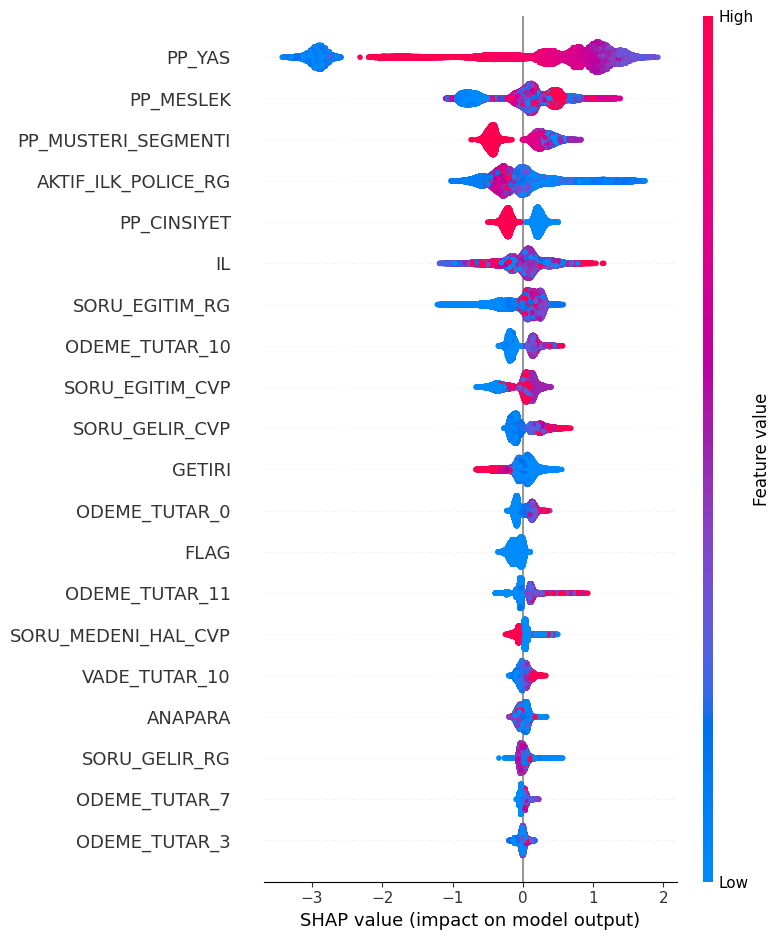

In [89]:
# SHAP değerlerini hesapla
explainer = shap.Explainer(model)
shap_values = explainer(X_test_14)

# SHAP değerlerini görselleştir
shap.summary_plot(shap_values, X_test_14)

In [ ]:
from sklearn.neighbors import NearestNeighbors
import numpy as np
import pandas as pd

# Veri setini yükleme ve öznitelikleri seçme
df = pd.read_csv('veri_seti.csv')
features = df[['sütun1', 'sütun2', 'sütun3']]  # Kullanmak istediğiniz sütunları seçin

# KNN modelini oluşturma
knn = NearestNeighbors(n_neighbors=5)  # Burada n_neighbors parametresi komşu sayısını belirler
knn.fit(features)

# Her veri noktasının komşuluk uzaklıklarını hesaplama
distances, _ = knn.kneighbors(features)

# Outlier tespiti için uzaklıkları kullanma
# Burada, örneğin, uzaklıkların 95. persentilinin üzerinde olanları outlier olarak kabul edebiliriz
threshold = np.percentile(distances[:, -1], 95)  # Son komşunun uzaklığını kullanarak eşik belirleme
outliers = distances[:, -1] > threshold

# Outlier olan veri noktalarını yazdırma
outlier_df = df[outliers]
print(outlier_df)